# Aula 2 - Limpeza dos dados

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
arquivo = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

In [3]:
imoveis = pd.read_csv(arquivo)
imoveis

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [4]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


### Corrigindo a coluna "Valor"

In [5]:
# Valor aparece como "object" porque é uma string, em vez de um decimal

In [6]:
imoveis['Valor'][0].split()

['R$', '7.000.000']

In [7]:
imoveis['Valor'][10006].split()

['R$', '2.200', '/Mês']

In [8]:
imoveis['Valor'].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [9]:
# Explorando os dados de cada coluna para garantir a integridade dos mesmos

In [10]:
imoveis['Valor'].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [11]:
imoveis['Valor'].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [12]:
imoveis['Valor'].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [13]:
imoveis[['Moeda', 'Preco', 'Tipo']] = imoveis['Valor'].str.split(expand=True)

In [14]:
imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [15]:
imoveis[imoveis['Tipo'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [16]:
imoveis[imoveis['Tipo'].isnull()]['Tipo'].unique()

array([None], dtype=object)

In [17]:
imoveis_venda = imoveis[imoveis['Tipo'].isnull()]
imoveis_venda

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [18]:
imoveis_venda['Preco'] = imoveis_venda['Preco'].str.replace(".", "").astype(float)

/tmp/ipykernel_163793/3514376467.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imoveis_venda['Preco'] = imoveis_venda['Preco'].str.replace(".", "").astype(float)
/tmp/ipykernel_163793/3514376467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imoveis_venda['Preco'] = imoveis_venda['Preco'].str.replace(".", "").astype(float)


In [19]:
imoveis_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6107 non-null   object 
 1   Bairro     9146 non-null   object 
 2   Cidade     9156 non-null   object 
 3   Metragem   9156 non-null   int64  
 4   Quartos    9156 non-null   int64  
 5   Banheiros  9156 non-null   int64  
 6   Vagas      9156 non-null   int64  
 7   Valor      9156 non-null   object 
 8   Moeda      9156 non-null   object 
 9   Preco      9156 non-null   float64
 10  Tipo       0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


In [20]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)
imoveis_venda.describe()

,Metragem,Quartos,Banheiros,Vagas,Preco
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [21]:
imoveis_venda.query('Preco == 13000.00')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Tipo
60,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,R$ 13.000,R$,13000.00,None


In [22]:
# Importante: ao se deparar com dados que não parecem coerentes, é importante buscar o conhecimento de
# especialistas naquele mercado que está sendo analisado, para que seja identificado erro de cadastro (e que
# deve ser eliminado do df) e outliers. Assim, a limpeza poderá ser feita da maneira correta.
# Neste caso do imóvel selecionado, provavelmente o valor se trata de um aluguel de imóvel comercial, porém,
# a periodicidade do pagamento não foi explicitada no cadastro.

In [24]:
imoveis_venda_sp = imoveis_venda[["Rua", "Bairro", "Metragem", "Quartos", "Banheiros", "Vagas", "Moeda", "Preco" ]]

In [25]:
imoveis_venda_sp

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Moeda,Preco
0,"Avenida Itacira, 255",Planalto Paulista,1000,4,8,6,R$,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,496,4,4,4,R$,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,R$,380000.00
3,NaN,Jardim Morumbi,310,3,2,4,R$,685000.00
4,"Rua Tobias Barreto, 195",Mooca,100,3,2,2,R$,540000.00
...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,267,3,6,4,R$,1500000.00
10003,Rua Tapuçu,Vila Sofia,95,2,2,2,R$,665000.00
10004,Rua Guararema,Bosque da Saúde,605,8,7,5,R$,2300000.00
10005,Rua Estero Belaco,Vila da Saúde,205,3,3,6,R$,1050000.00


## Primeiros gráficos

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

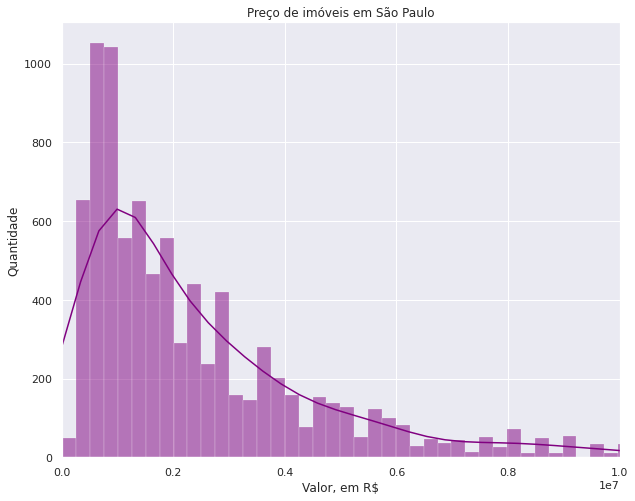

In [27]:
sns.set()
plt.figure(figsize=(10,8))
ax = sns.histplot(data=imoveis_venda_sp, x='Preco', kde=True, color='purple')
plt.xlim((0, 10000000))
ax.set_title("Preço de imóveis em São Paulo")
plt.xlabel('Valor, em R$')
plt.ylabel('Quantidade')
plt.show()

# Desafios Aula 2

### 1) Gráfico com preço do metro quadrado por bairro

In [ ]:
imoveis_venda_sp

In [28]:
metro_quadrado = imoveis_venda_sp["Preco"]/imoveis_venda_sp["Metragem"]
imoveis_venda_sp["Preco_mquadrado"] = metro_quadrado
imoveis_venda_sp

/tmp/ipykernel_163793/435986514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imoveis_venda_sp["Preco_mquadrado"] = metro_quadrado


,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Moeda,Preco,Preco_mquadrado
0,"Avenida Itacira, 255",Planalto Paulista,1000,4,8,6,R$,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,496,4,4,4,R$,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,R$,380000.00,3040.00
3,NaN,Jardim Morumbi,310,3,2,4,R$,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,100,3,2,2,R$,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,267,3,6,4,R$,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,95,2,2,2,R$,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,605,8,7,5,R$,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,205,3,3,6,R$,1050000.00,5121.95


In [29]:
#salvando o dataframe em csv para consultas futuras
imoveis_venda_sp.to_csv("dados/imoveis_venda_sp", sep=";", index = False)

In [30]:
metro_quadrado_bairro = imoveis_venda_sp["Preco_mquadrado"].groupby(imoveis_venda_sp["Bairro"]).mean()
metro_quadrado_bairro = pd.DataFrame(metro_quadrado_bairro)
metro_quadrado_bairro.reset_index(inplace=True)
metro_quadrado_bairro

,Bairro,Preco_mquadrado
0,Aclimação,7656.17
1,Alto da Boa Vista,5849.57
2,Alto da Lapa,7606.73
3,Alto da Mooca,5691.74
4,Alto de Pinheiros,11269.98
...,...,...
692,Vila Água Funda,4467.13
693,Água Branca,7269.11
694,Água Fria,5841.10
695,Água Funda,3876.86


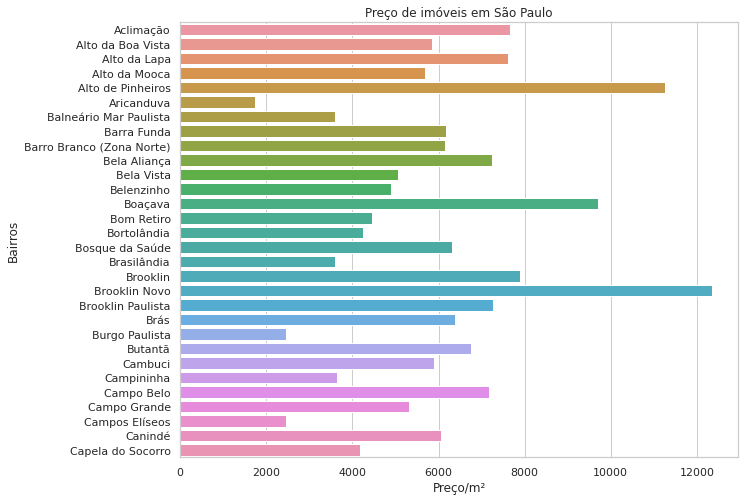

In [31]:
sns.set(style = 'whitegrid')  
plt.figure(figsize=(10,8))
bp = sns.barplot(x="Preco_mquadrado", y="Bairro", data=metro_quadrado_bairro.head(30))
bp.set_title("Preço de imóveis em São Paulo")
plt.xlabel('Preço/m²')
plt.ylabel('Bairros')
plt.show()

### 2) Boxplot: Visualização de quartis, mediana e outliers

/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


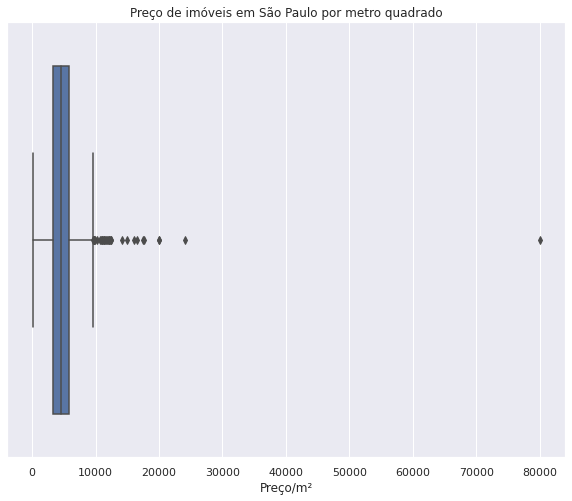

In [32]:
sns.set() 
plt.figure(figsize=(10,8))
bp = sns.boxplot(metro_quadrado_bairro["Preco_mquadrado"])
bp.set_title("Preço de imóveis em São Paulo por metro quadrado")
plt.xlabel('Preço/m²')
plt.show()

#### Ao observar no gráfico de boxplot, que contém a mediada (3Q) do preço dos imóveis por metro quadrado, nota-se a preença de fortes outliers, afetando as estatísticas do mercado analisado.

### Excluindo os principais outliers

In [33]:
mquadrado_sem_ouliers = metro_quadrado_bairro.query("Preco_mquadrado < 20000")

/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


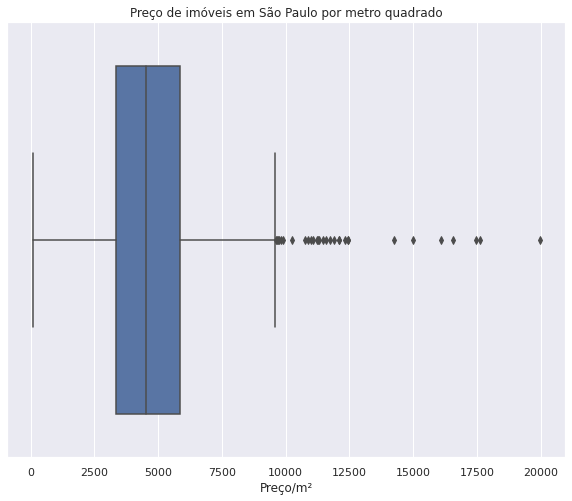

In [34]:
sns.set() 
plt.figure(figsize=(10,8))
bp = sns.boxplot(mquadrado_sem_ouliers["Preco_mquadrado"])
bp.set_title("Preço de imóveis em São Paulo por metro quadrado")
plt.xlabel('Preço/m²')
plt.show()